# The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

# About Dataset
<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>

## Variable Notes
<p><b>pclass</b>: A proxy for socio-economic status (SES)<br> 1st = Upper<br> 2nd = Middle<br> 3rd = Lower<br><br> <b>age</b>: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5<br><br> <b>sibsp</b>: The dataset defines family relations in this way...<br> Sibling = brother, sister, stepbrother, stepsister<br> Spouse = husband, wife (mistresses and fiancés were ignored)<br><br> <b>parch</b>: The dataset defines family relations in this way...<br> Parent = mother, father<br> Child = daughter, son, stepdaughter, stepson<br> Some children travelled only with a nanny, therefore parch=0 for them.</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl



In [130]:
font_prop = {
    'family':'Times New Roman',
    'size':15,
    'weight':'medium'
}
mpl.rc('font', **font_prop)

In [175]:
df_train = pd.read_csv("datasets/titanic/train.csv")
df_test = pd.read_csv("datasets/titanic/test.csv")

## Getting feel of data

In [176]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [177]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [178]:
sel_feat = df_train[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Survived']] 

In [179]:
sel_feat['Family'] = df_train['SibSp']+df_train['Parch'] #creating a new feature family memebers on board based on parcha adn sibsp

C:\Users\paude\AppData\Local\Temp/ipykernel_11036/3858888318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_feat['Family'] = df_train['SibSp']+df_train['Parch'] #creating a new feature family memebers on board based on parcha adn sibsp


In [180]:
sel_feat

,Pclass,Sex,Age,Fare,Embarked,Survived,Family
0,3,male,22.0,7.2500,S,0,1
1,1,female,38.0,71.2833,C,1,1
2,3,female,26.0,7.9250,S,1,0
3,1,female,35.0,53.1000,S,1,1
4,3,male,35.0,8.0500,S,0,0
...,...,...,...,...,...,...,...
886,2,male,27.0,13.0000,S,0,0
887,1,female,19.0,30.0000,S,1,0
888,3,female,NaN,23.4500,S,0,3
889,1,male,26.0,30.0000,C,1,0


In [181]:
sel_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Fare      891 non-null    float64
 4   Embarked  889 non-null    object 
 5   Survived  891 non-null    int64  
 6   Family    891 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


#### Note: there are 2 features with categorical variables so, changing them into numerical vars

In [182]:
sel_feat['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [183]:
sel_feat['Family'].values

array([ 1,  1,  0,  1,  0,  0,  0,  4,  2,  1,  2,  0,  0,  6,  0,  0,  5,
        0,  1,  0,  0,  0,  0,  0,  4,  6,  0,  5,  0,  0,  0,  1,  0,  0,
        1,  1,  0,  0,  2,  1,  1,  1,  0,  3,  0,  0,  1,  0,  2,  1,  5,
        0,  1,  1,  1,  0,  0,  0,  3,  7,  0,  0,  1,  5,  0,  2,  0,  0,
        6,  2,  0,  7,  0,  1,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,
        3,  4,  0,  5,  0,  0,  0,  1,  3,  0,  0,  0,  1,  1,  1,  0,  0,
        1,  0,  2,  0,  0,  0,  0,  1,  0,  1,  0,  1,  0,  0,  0,  1,  1,
        6,  2,  0,  1,  0,  1,  1,  0,  0,  2,  0,  0,  0,  1,  1,  0,  0,
        2,  1,  0,  0,  2,  0,  1,  0,  0,  2,  0,  4,  2,  0,  0,  1,  0,
        2,  0,  1,  0,  0,  0, 10,  1,  0,  0,  0,  5,  2,  1,  5,  0,  0,
        0,  5,  2,  0,  0,  2,  4,  0,  0,  0, 10,  0,  6,  3,  2,  0,  1,
        0,  2,  0,  0,  0,  1,  2,  0,  0,  0,  1,  0,  0,  0, 10,  0,  0,
        0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  1,  0,  0,  0,
        0,  0,  0,  1,  0

In [184]:
for col in sel_feat.columns:
    print(f"Column = {col}")
    print(sel_feat[col].value_counts())
    print(sel_feat[col].value_counts().sum())
    print("---\n")

Column = Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64
891
---

Column = Sex
male      577
female    314
Name: Sex, dtype: int64
891
---

Column = Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64
714
---

Column = Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64
891
---

Column = Embarked
S    644
C    168
Q     77
Name: Embarked, dtype: int64
889
---

Column = Survived
0    549
1    342
Name: Survived, dtype: int64
891
---

Column = Family
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family, dtype: int64
891
---



### Handling nan values

In [185]:
sel_feat[sel_feat.isna()['Age'] == True]

,Pclass,Sex,Age,Fare,Embarked,Survived,Family
5,3,male,NaN,8.4583,Q,0,0
17,2,male,NaN,13.0000,S,1,0
19,3,female,NaN,7.2250,C,1,0
26,3,male,NaN,7.2250,C,0,0
28,3,female,NaN,7.8792,Q,1,0
...,...,...,...,...,...,...,...
859,3,male,NaN,7.2292,C,0,0
863,3,female,NaN,69.5500,S,0,10
868,3,male,NaN,9.5000,S,0,0
878,3,male,NaN,7.8958,S,0,0


**Median Fill**

In [186]:
sel_feat['Age'].median()

28.0

In [187]:
sel_feat['Age'].fillna(sel_feat['Age'].median(), inplace=True)

c:\users\paude\appdata\local\programs\python\python38\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [188]:
sel_feat

,Pclass,Sex,Age,Fare,Embarked,Survived,Family
0,3,male,22.0,7.2500,S,0,1
1,1,female,38.0,71.2833,C,1,1
2,3,female,26.0,7.9250,S,1,0
3,1,female,35.0,53.1000,S,1,1
4,3,male,35.0,8.0500,S,0,0
...,...,...,...,...,...,...,...
886,2,male,27.0,13.0000,S,0,0
887,1,female,19.0,30.0000,S,1,0
888,3,female,28.0,23.4500,S,0,3
889,1,male,26.0,30.0000,C,1,0


**Filling Embarked Nans**

In [189]:
sel_feat['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [190]:
sel_feat['Embarked'].fillna('S', inplace=True)

c:\users\paude\appdata\local\programs\python\python38\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [191]:
sel_feat['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

## Visualizing data

In [192]:
y = sel_feat['Survived']

In [193]:
X = sel_feat.drop('Survived', axis=1)

In [194]:
X

,Pclass,Sex,Age,Fare,Embarked,Family
0,3,male,22.0,7.2500,S,1
1,1,female,38.0,71.2833,C,1
2,3,female,26.0,7.9250,S,0
3,1,female,35.0,53.1000,S,1
4,3,male,35.0,8.0500,S,0
...,...,...,...,...,...,...
886,2,male,27.0,13.0000,S,0
887,1,female,19.0,30.0000,S,0
888,3,female,28.0,23.4500,S,3
889,1,male,26.0,30.0000,C,0


Lets do some plotting jobs

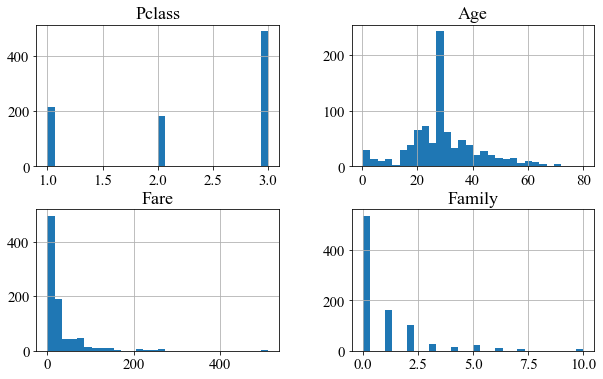

In [195]:
X.hist(bins=30, figsize=(10,6))
plt.show()

#### Looking for any correlation between the daata

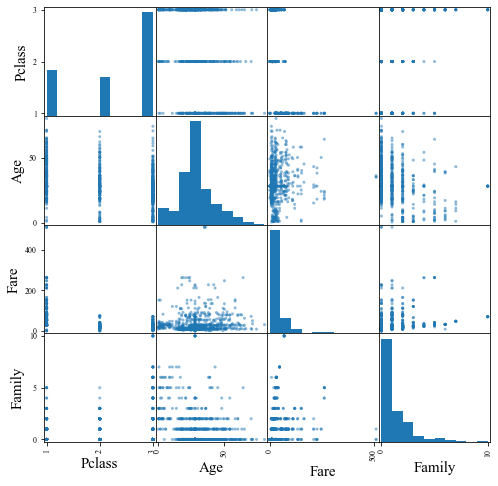

In [196]:
from pandas.plotting import scatter_matrix

scatter_matrix(X, figsize=(8,8))
plt.show()

### Lets see which training features and what attributes has high chance of survival

### 1. Sex

In [197]:
len(sel_feat[(sel_feat['Survived'] == 1) & (sel_feat['Sex'] == 'male')])

109

In [198]:
len(sel_feat[(sel_feat['Survived'] == 1) & (sel_feat['Sex'] == 'female')])

233

In [199]:
#creating survived and not survived males and females: males in 1st col and females in 2nd
survived = [len(sel_feat[(sel_feat['Survived'] == 1) & (sel_feat['Sex'] == 'male')]), len(sel_feat[(sel_feat['Survived'] == 1) & (sel_feat['Sex'] == 'female')])]
nsurvived = [len(sel_feat[(sel_feat['Survived'] == 0) & (sel_feat['Sex'] == 'male')]), len(sel_feat[(sel_feat['Survived'] == 0) & (sel_feat['Sex'] == 'female')])]


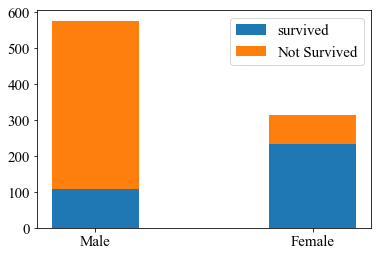

In [200]:
fig, ax = plt.subplots()
ax.bar(['Male', 'Female'], survived, label="survived", width=.4)
ax.bar(['Male', 'Female'], nsurvived, bottom=survived, label="Not Survived", width=.4)
plt.legend()

**This shows survival for females are higher**

### 2. Pclass

In [201]:
#creating survived and not survived males and females: males in 1st col and females in 2nd
#creating survived and not survived males and females: males in 1st col and females in 2nd
survived_pclass = [len(sel_feat[(sel_feat['Survived'] == 1) & (sel_feat['Pclass'] == 1)]),
            len(sel_feat[(sel_feat['Survived'] == 1) & (sel_feat['Pclass'] == 2)]),
            len(sel_feat[(sel_feat['Survived'] == 1) & (sel_feat['Pclass'] == 3)])]
nsurvived_pclass = [len(sel_feat[(sel_feat['Survived'] == 0) & (sel_feat['Pclass'] == 1)]),
            len(sel_feat[(sel_feat['Survived'] == 0) & (sel_feat['Pclass'] == 2)]),
            len(sel_feat[(sel_feat['Survived'] == 0) & (sel_feat['Pclass'] == 3)])]

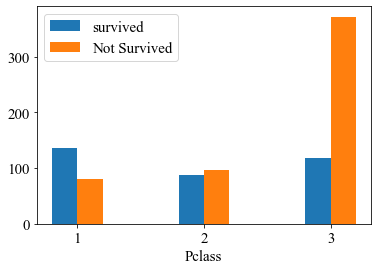

In [202]:
fig, ax = plt.subplots()
ax.bar(np.sort(sel_feat['Pclass'].unique()), survived_pclass, label="survived", width=.2)
ax.bar(np.sort(sel_feat['Pclass'].unique())+.2, nsurvived_pclass, label="Not Survived", width=.2)
ax.set_xticks(np.sort(sel_feat['Pclass'].unique())+.1)
ax.set_xticklabels(range(1,4))
ax.set_xlabel("Pclass")
plt.legend()

**This shows higher no. of 3rd pclass were not survived**

### 3. Embarked

In [203]:
sel_feat['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [204]:

survived_emb = [len(sel_feat[(sel_feat['Survived'] == 1) & (sel_feat['Embarked'] == 'S')]),
            len(sel_feat[(sel_feat['Survived'] == 1) & (sel_feat['Embarked'] == 'C')]),
            len(sel_feat[(sel_feat['Survived'] == 1) & (sel_feat['Embarked'] == 'Q')])]
nsurvived_emb = [len(sel_feat[(sel_feat['Survived'] == 0) & (sel_feat['Embarked'] == 'S')]),
            len(sel_feat[(sel_feat['Survived'] == 0) & (sel_feat['Embarked'] == 'C')]),
            len(sel_feat[(sel_feat['Survived'] == 0) & (sel_feat['Embarked'] == 'Q')])]

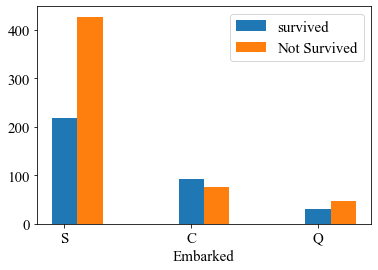

In [205]:
#C = Cherbourg, Q = Queenstown, S = Southampton

fig, ax = plt.subplots()
ax.bar(range(3), survived_emb, label="survived", width=.2)
ax.bar(np.array(range(3))+.2, nsurvived_emb, label="Not Survived", width=.2, )
ax.set_xticks(range(3))
ax.set_xticklabels(sel_feat['Embarked'].unique())
ax.set_xlabel("Embarked")
plt.legend()

### 4. Age

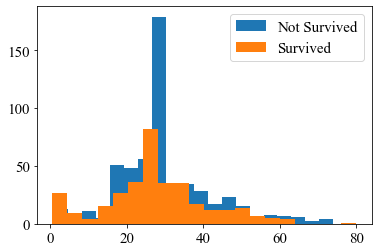

In [206]:
fig, ax = plt.subplots()
a = ax.hist(sel_feat[y==0]['Age'], bins=20, label='Not Survived')
b = ax.hist(sel_feat[y==1]['Age'], bins=20, label='Survived')
plt.legend()

This shows people of age 25-30 not survived, now lets look for sex relation with age

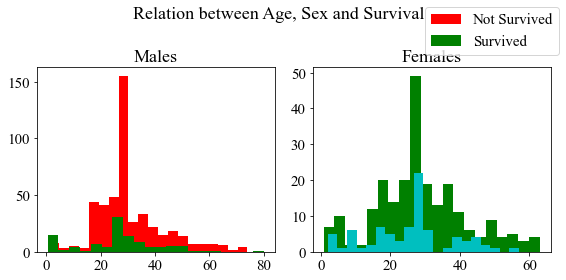

In [207]:
fig, ax = plt.subplots(1,2, figsize=(8,4))
ax[0].hist(sel_feat[(sel_feat['Survived'] == 0) & (sel_feat['Sex'] == 'male')]['Age'], bins=20, color='r', label='Not Survived')
ax[0].hist(sel_feat[(sel_feat['Survived'] == 1) & (sel_feat['Sex'] == 'male')]['Age'], bins=20, color='g', label='Survived')
ax[0].set_title("Males")

ax[1].hist(sel_feat[(sel_feat['Survived'] == 1) & (sel_feat['Sex'] == 'female')]['Age'], bins=20, color='g', label='Survived')
ax[1].hist(sel_feat[(sel_feat['Survived'] == 0) & (sel_feat['Sex'] == 'female')]['Age'], bins=20, color='c', label='Not Survived')
ax[1].set_title("Females")

fig.suptitle("Relation between Age, Sex and Survival")
fig.legend(['Not Survived','Survived'])
fig.tight_layout()

This show: Males of Age 20-40 not survived a lot, but females of that age survived and in general survival is large for females too

## 5. Fare

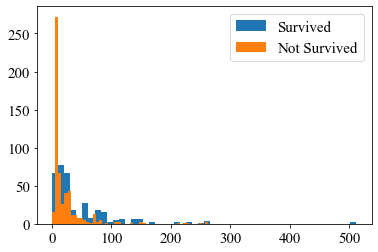

In [213]:
fig, ax = plt.subplots()
b = ax.hist(sel_feat[y==1]['Fare'],bins=50, label='Survived')
a = ax.hist(sel_feat[y==0]['Fare'],bins=50, label='Not Survived')

plt.legend()

## 6. Relation with Family


#### a. our created family feature

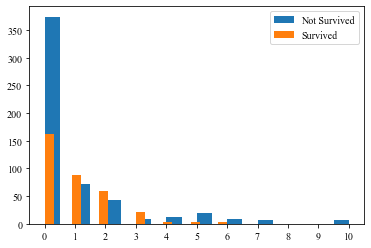

In [45]:
fig, ax = plt.subplots()
a = ax.hist(sel_feat[y==0]['Family'], bins=20, label='Not Survived')
b = ax.hist(sel_feat[y==1]['Family'], bins=20, label='Survived')
ax.set_xticks(range(11))
plt.legend()

#### b. Parch feature

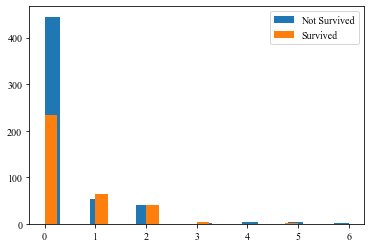

In [38]:
fig, ax = plt.subplots()
a = ax.hist(df_train[y==0]['Parch'], bins=20, label='Not Survived')
b = ax.hist(df_train[y==1]['Parch'], bins=20, label='Survived')
plt.legend()

#### b. SibSp feature


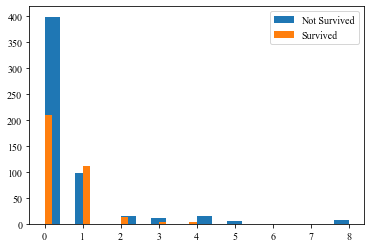

In [41]:
fig, ax = plt.subplots()
a = ax.hist(df_train[y==0]['SibSp'], bins=20, label='Not Survived')
b = ax.hist(df_train[y==1]['SibSp'], bins=20, label='Survived')
plt.legend()

> This data doesn't show any specific relations.
- The data for 0 family memebers on board are high so they have higher survival and non-survival rate too


## Handling Non Numeric Attributes

In [53]:
sex_cat  = X['Sex']
embarked_cat = X['Embarked']

In [54]:
embarked_cat

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [55]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

sex_cat_encoded = ordinal_encoder.fit_transform(sex_cat.values.reshape(-1,1))
embarked_cat_encoded = ordinal_encoder.fit_transform(embarked_cat.values.reshape(-1,1))

In [56]:
sex_cat_encoded[:5], sex_cat[:5]

(array([[1.],
        [0.],
        [0.],
        [0.],
        [1.]]),
 0      male
 1    female
 2    female
 3    female
 4      male
 Name: Sex, dtype: object)

In [69]:
embarked_cat_encoded[885:], embarked_cat[885:]

(array([[1.],
        [2.],
        [2.],
        [2.],
        [0.],
        [1.]]),
 885    Q
 886    S
 887    S
 888    S
 889    C
 890    Q
 Name: Embarked, dtype: object)

In [62]:
X

,Pclass,Sex,Age,Fare,Embarked,Family
0,3,male,22.0,7.2500,S,1
1,1,female,38.0,71.2833,C,1
2,3,female,26.0,7.9250,S,0
3,1,female,35.0,53.1000,S,1
4,3,male,35.0,8.0500,S,0
...,...,...,...,...,...,...
886,2,male,27.0,13.0000,S,0
887,1,female,19.0,30.0000,S,0
888,3,female,28.0,23.4500,S,3
889,1,male,26.0,30.0000,C,0


In [63]:
X['Sex'] = sex_cat_encoded
X['Embarked'] = embarked_cat_encoded

In [73]:
X.head(10)

,Pclass,Sex,Age,Fare,Embarked,Family
0,3,1.0,22.0,7.2500,2.0,1
1,1,0.0,38.0,71.2833,0.0,1
2,3,0.0,26.0,7.9250,2.0,0
3,1,0.0,35.0,53.1000,2.0,1
4,3,1.0,35.0,8.0500,2.0,0
5,3,1.0,28.0,8.4583,1.0,0
6,1,1.0,54.0,51.8625,2.0,0
7,3,1.0,2.0,21.0750,2.0,4
8,3,0.0,27.0,11.1333,2.0,2
9,2,0.0,14.0,30.0708,0.0,1


In [74]:
X.count()

Pclass      891
Sex         891
Age         891
Fare        891
Embarked    891
Family      891
dtype: int64

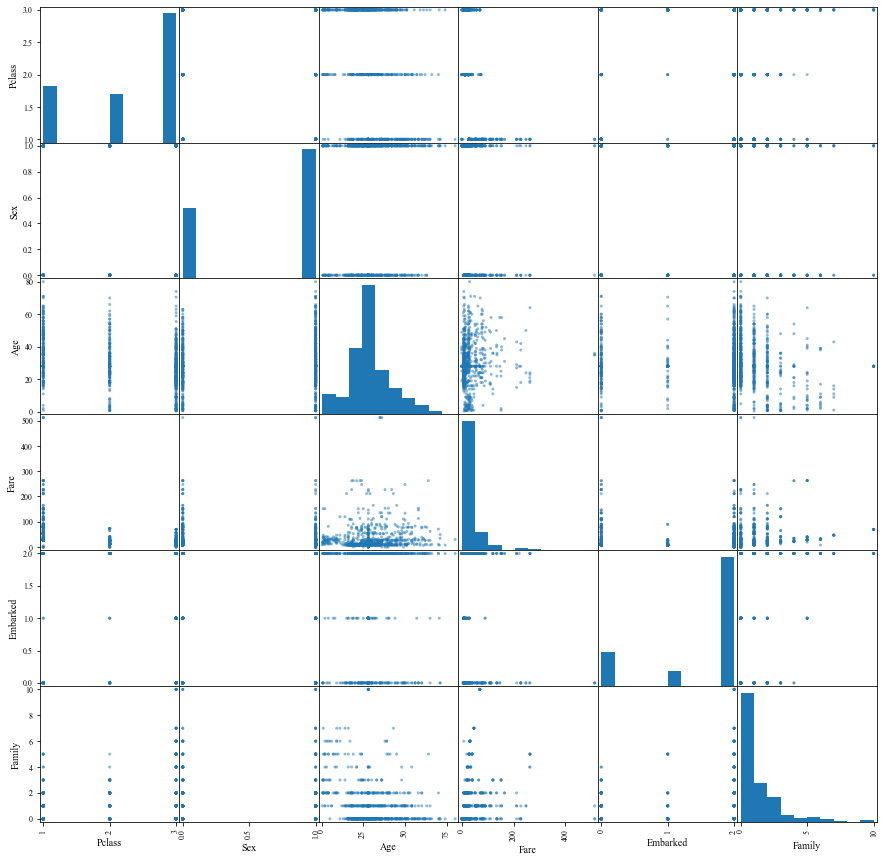

In [76]:
scatter_matrix(X, figsize=(15,15))
plt.show()

In [78]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Training the model
### 1. Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=10)

In [82]:
from sklearn.model_selection import cross_val_predict, cross_val_score

y_pred_cv = cross_val_predict(lr, X, y, cv=3)
cv_score =  cross_val_score(lr, X, y, cv=3)
cv_score

array([0.78787879, 0.79461279, 0.7979798 ])

In [83]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred_cv)

0.7934904601571269

##### Looking for Generalization performance

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=42)

In [85]:
lr = LogisticRegression(random_state=10)

In [87]:
lr.fit(X_train, y_train)
cross_val_score(lr, X_train, y_train, cv=3)

array([0.79411765, 0.81012658, 0.78481013])

In [88]:
yhat_test = lr.predict(X_test)

In [89]:
accuracy_score(y_test, yhat_test)

0.8044692737430168

In [90]:
from sklearn.metrics import confusion_matrix


In [92]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [91]:
cnf_test = confusion_matrix(y_test, yhat_test)
cnf_test

array([[90, 15],
       [20, 54]], dtype=int64)

Confusion matrix, without normalization
[[90 15]
 [20 54]]


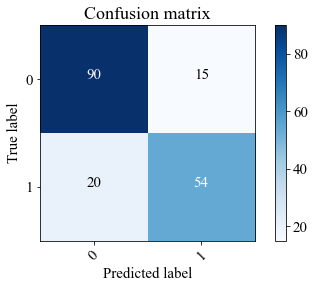

In [131]:
plot_confusion_matrix(cnf_test, lr.classes_)

Confusion matrix, without normalization
[[387  57]
 [ 83 185]]


0.8033707865168539

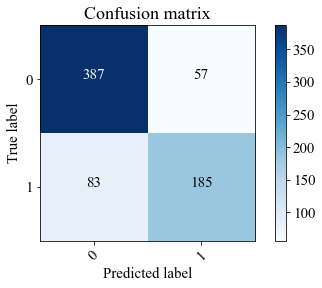

In [132]:
#how it fits model data:
yhat_train = lr.predict(X_train)
cnf_train  = confusion_matrix(y_train, yhat_train)
plot_confusion_matrix(cnf_train, lr.classes_)
accuracy_score(y_train, yhat_train)

In [122]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y_test, yhat_test), recall_score(y_test, yhat_test), f1_score(y_test, yhat_test)

(0.782608695652174, 0.7297297297297297, 0.7552447552447553)

Now lets see accuracy with sgd classifier

### 2. SGD Classifier

In [133]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(loss = 'log_loss', random_state=42)

In [134]:
sgd_clf.fit(X_train ,y_train)

SGDClassifier(loss='log_loss', random_state=42)

In [135]:
y_trn_cv_sgd = cross_val_predict(sgd_clf, X_train , y_train, cv=3)

Confusion matrix, without normalization
[[380  64]
 [194  74]]


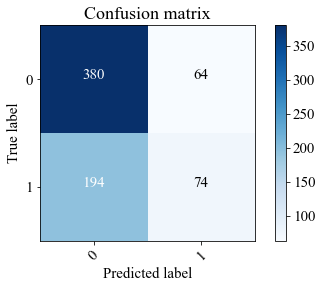

In [136]:
plot_confusion_matrix(confusion_matrix(y_train, y_trn_cv_sgd), sgd_clf.classes_)

In [137]:
sgd_cv_score = cross_val_score(sgd_clf, X_train , y_train, cv=3)
sgd_cv_score

array([0.62184874, 0.62447257, 0.66666667])

In [138]:
accuracy_score(y_train, sgd_clf.predict(X_train)), accuracy_score(y_test, sgd_clf.predict(X_test)), 

(0.7078651685393258, 0.7877094972067039)

Confusion matrix, without normalization
[[92 13]
 [25 49]]


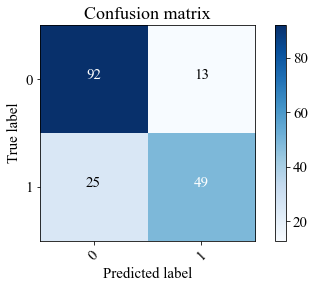

In [139]:
y_tst_prd = sgd_clf.predict(X_test)
plot_confusion_matrix(confusion_matrix(y_test, y_tst_prd), sgd_clf.classes_)

#### SDG clf model is even poor, but its generalization is good

### 3. Regulaized logistic regression

In [140]:
from sklearn.linear_model import RidgeClassifier
ridge_clf = RidgeClassifier(alpha=2)

In [141]:
ridge_clf.fit(X_train, y_train)

RidgeClassifier(alpha=2)

In [142]:
accuracy_score(y_train, ridge_clf.predict(X_train)), accuracy_score(y_test, ridge_clf.predict(X_test)), 

(0.8019662921348315, 0.8044692737430168)

In [143]:
cross_val_score(ridge_clf, X_train , y_train, cv=3)

array([0.77731092, 0.80590717, 0.78481013])

### 4. Feature Scaling and training logistic model again

In [151]:
from sklearn.preprocessing import StandardScaler
std_scl = StandardScaler()

In [158]:
X_fs = std_scl.fit_transform(X)

In [161]:
X_fs.shape

(891, 6)

In [162]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X_fs, y, random_state=42)

In [163]:
log_reg = LogisticRegression()

In [164]:
log_reg.fit(X_tr, y_tr)

LogisticRegression()

In [165]:
accuracy_score(y_tr, log_reg.predict(X_tr))

0.8038922155688623

In [167]:
cross_val_score(log_reg, X_tr, y_tr, cv=3)

array([0.82511211, 0.78475336, 0.7972973 ])

In [168]:
accuracy_score(y_ts, log_reg.predict(X_ts))

0.8026905829596412

#### So, out of all best performance was on Previous Logistic Regression Model without feature scaling

# doing on test data set for final output

In [169]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [214]:
test_feat = df_test[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']] 

In [215]:
test_feat['Family'] = df_test['SibSp']+df_train['Parch'] #creating a new feature family memebers on board based on parcha adn sibsp

C:\Users\paude\AppData\Local\Temp/ipykernel_11036/1801625632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_feat['Family'] = df_test['SibSp']+df_train['Parch'] #creating a new feature family memebers on board based on parcha adn sibsp


In [216]:
test_feat

,Pclass,Sex,Age,Fare,Embarked,Family
0,3,male,34.5,7.8292,Q,0.0
1,3,female,47.0,7.0000,S,1.0
2,2,male,62.0,9.6875,Q,0.0
3,3,male,27.0,8.6625,S,0.0
4,3,female,22.0,12.2875,S,1.0
...,...,...,...,...,...,...
413,3,male,NaN,8.0500,S,0.0
414,1,female,39.0,108.9000,C,0.0
415,3,male,38.5,7.2500,S,0.0
416,3,male,NaN,8.0500,S,1.0


In [220]:
test_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   Fare      417 non-null    float64
 4   Embarked  418 non-null    object 
 5   Family    418 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 19.7+ KB


In [221]:
test_feat['Age'].fillna(test_feat['Age'].median(), inplace=True)
test_feat['Fare'].fillna(test_feat['Fare'].median(), inplace=True)

c:\users\paude\appdata\local\programs\python\python38\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
c:\users\paude\appdata\local\programs\python\python38\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [222]:
test_feat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   Fare      418 non-null    float64
 4   Embarked  418 non-null    object 
 5   Family    418 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 19.7+ KB


In [223]:
sex_cat  = test_feat['Sex']
embarked_cat = test_feat['Embarked']

ordinal_encoder = OrdinalEncoder()

sex_cat_encoded = ordinal_encoder.fit_transform(sex_cat.values.reshape(-1,1))
embarked_cat_encoded = ordinal_encoder.fit_transform(embarked_cat.values.reshape(-1,1))

test_feat['Sex'] = sex_cat_encoded
test_feat['Embarked'] = embarked_cat_encoded

C:\Users\paude\AppData\Local\Temp/ipykernel_11036/1856534960.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_feat['Sex'] = sex_cat_encoded
C:\Users\paude\AppData\Local\Temp/ipykernel_11036/1856534960.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_feat['Embarked'] = embarked_cat_encoded


In [224]:
test_feat

,Pclass,Sex,Age,Fare,Embarked,Family
0,3,1.0,34.5,7.8292,1.0,0.0
1,3,0.0,47.0,7.0000,2.0,1.0
2,2,1.0,62.0,9.6875,1.0,0.0
3,3,1.0,27.0,8.6625,2.0,0.0
4,3,0.0,22.0,12.2875,2.0,1.0
...,...,...,...,...,...,...
413,3,1.0,27.0,8.0500,2.0,0.0
414,1,0.0,39.0,108.9000,0.0,0.0
415,3,1.0,38.5,7.2500,2.0,0.0
416,3,1.0,27.0,8.0500,2.0,1.0


In [225]:
y_hat = lr.predict(test_feat)

In [226]:
y_hat

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [227]:
y_hat.shape

(418,)

In [229]:
submit_dict = {'PassengerId':df_test['PassengerId'], 'Survived':y_hat}

In [230]:
submit_df = pd.DataFrame(submit_dict)

In [231]:
submit_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [233]:
submit_df.to_csv("Submit_file.csv", index=False)